#Installing dependencies / Libraries


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # more plotting
from sklearn.model_selection import train_test_split # ML utilities
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, accuracy_score# more ML utilities
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.linear_model import LogisticRegression #Logistic Regression Model
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/Shared drives/Cognitive Robotics/Coursework-2/cr_dataset.xlsx'

#Reading data

In [ ]:
data = pd.read_excel(file_path)

In [ ]:
print(data.columns)
len(data.columns)

Index(['Label', 'Spectral Centroid Mean', 'Spectral Bandwidth Mean',
       'RMS Mean', 'Zero-Crossing Rate Mean', 'Spectral Contrast Mean',
       'Pitch Mean', 'Pitch Confidence Mean', 'Mel Spectrogram Mean',
       'Mel Spectrogram Variance', 'Energy Mean'],
      dtype='object')


11

#Normalizing data

In [ ]:
X = data.drop(columns='Label')
y = data['Label']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["Label"] = y

data = X_scaled_df

data.head()

,Spectral Centroid Mean,Spectral Bandwidth Mean,RMS Mean,Zero-Crossing Rate Mean,Spectral Contrast Mean,Pitch Mean,Pitch Confidence Mean,Mel Spectrogram Mean,Mel Spectrogram Variance,Energy Mean,Label
0,-0.026249,0.885689,-1.314756,-0.477014,-1.605224,-0.190813,-1.082198,-1.083496,-0.690550,-1.314756,Angry
1,-0.264082,-0.415410,-0.319924,-0.286107,0.641664,0.955324,-0.111694,-0.358190,-0.461295,-0.319924,Angry
2,0.024847,-0.697322,-0.177650,0.021084,0.688180,1.402508,-0.110436,-0.428956,-0.475478,-0.177650,Angry
3,-0.093959,0.636011,-0.311180,-0.468584,-0.793457,-0.756301,-0.266168,-0.231685,-0.274038,-0.311180,Angry
4,-0.865572,-1.027480,-0.047389,-0.649973,-0.098461,-0.348568,0.008987,-0.156789,-0.325431,-0.047389,Angry


In [ ]:
cleaned_data = data.dropna()
data = cleaned_data
has_null = data.isnull().any().any()
print(has_null)

False


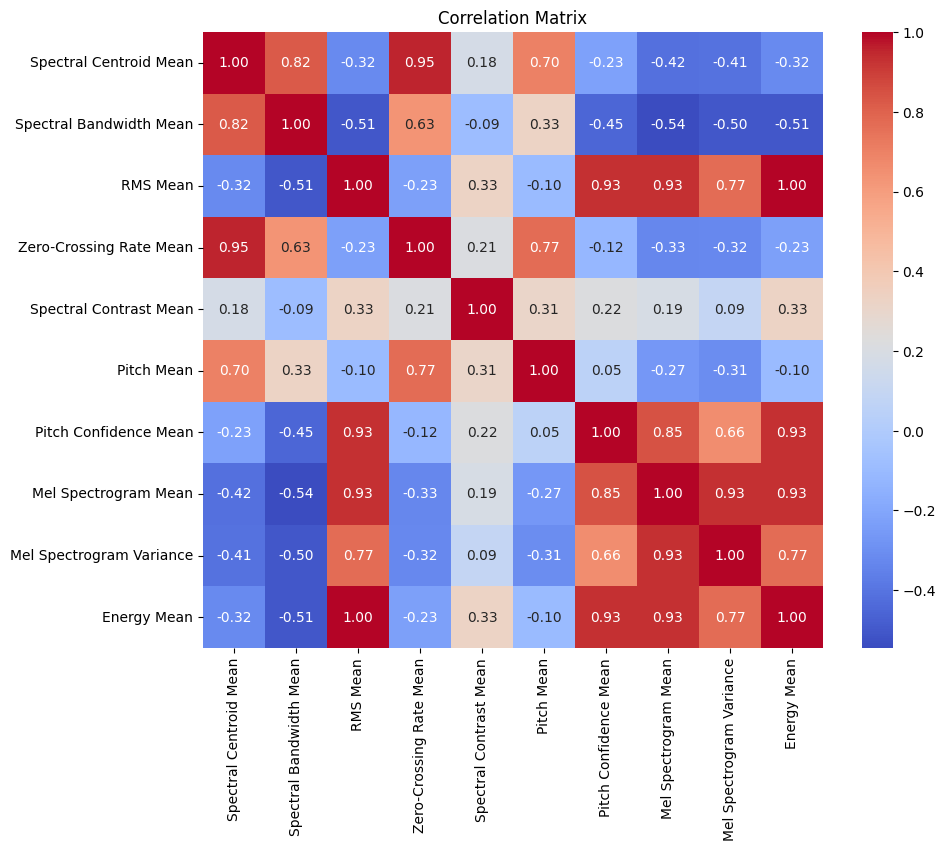

In [ ]:
numeric_df = data.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

#correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#PCA

Scree Plot


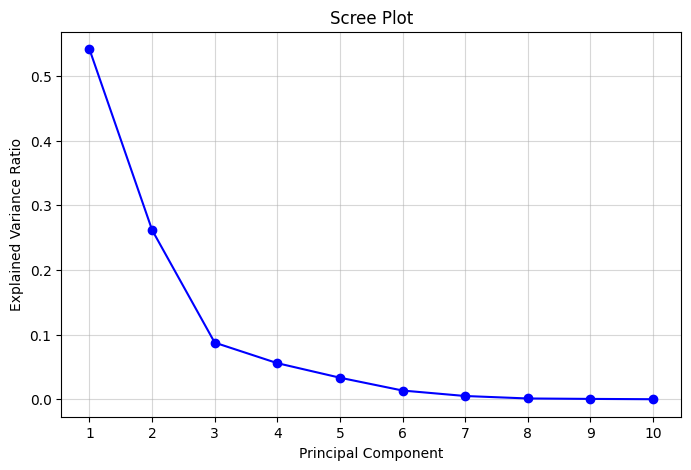


Cummulative Variance of each PC: - [0.54148333 0.80332663 0.89089248 0.94666407 0.9799416  0.99338324
 0.99835533 0.99951105 1.         1.        ]


In [ ]:
X = data.drop(columns='Label') #features
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

#scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Ensure PC indices are shown
plt.grid(alpha=0.5)
plt.show()

cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("\nCummulative Variance of each PC: -",cumulative_variance)


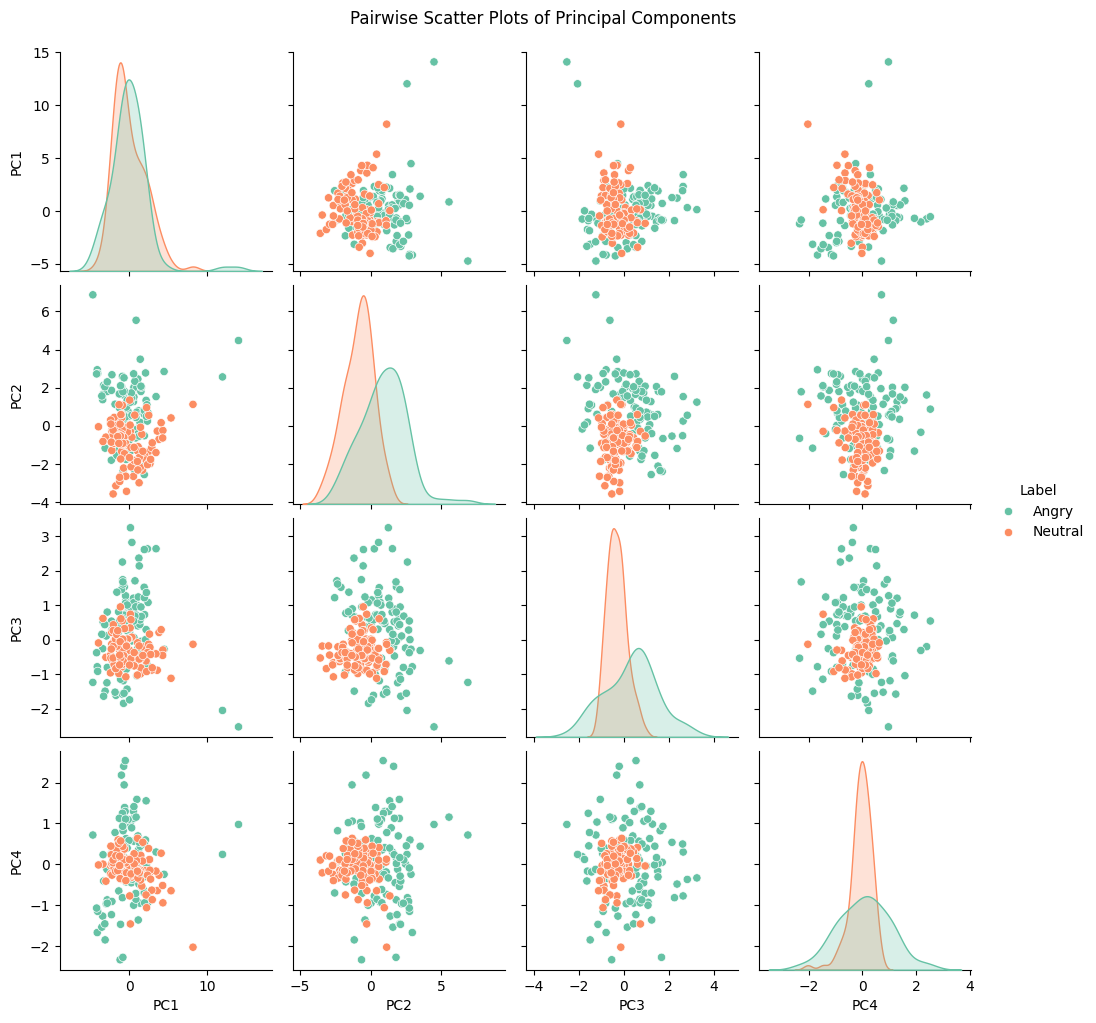

In [ ]:
X = data.drop(columns='Label')  # Features
y = data['Label']  # Labels

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

#PCA dataframe (PCA features table)
data_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(4)])
data_pca['Label'] = y  # Add the label column back

sns.pairplot(data_pca, vars=["PC1", "PC2", "PC3", "PC4"], hue="Label", palette="Set2")
plt.suptitle("Pairwise Scatter Plots of Principal Components", y=1.02)
plt.show()

In [ ]:
data_pca_cleaned = data_pca.dropna(axis=0, how='any')
data_pca = data_pca_cleaned
data_pca.isna().any().any()

False

In [ ]:
data_pca.head()

,PC1,PC2,PC3,PC4,Label
0,-2.343693,-1.794409,-0.934629,0.259102,Angry
1,-0.440910,0.067208,1.157845,0.627858,Angry
2,-0.500068,0.566529,1.278358,0.981993,Angry
3,-0.523406,-1.031524,-0.738762,-0.346980,Angry
4,0.563312,-1.159637,0.673938,0.564844,Angry


#Data Split: - Labels and Features

In [ ]:
X = data_pca.iloc[:, :-1]  #features
y = data_pca.iloc[:, -1]   #labels

avg_accuracies = {"KNN": 0,"LogReg": 0, "Naive Bayes": 0, "Random Forest": 0}

#Model - K-Nearest Neighbours

In [ ]:
splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracies = []
for ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=67)

    n_neighbors = len(X_train)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)  # You can adjust the value of `n_neighbors`
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Train-Test split ratio: {(1-ratio)*100:.1f}% - {ratio*100:.1f}%")
    print(f"Accuracy: {accuracy}")
    accuracies.append(accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracy_knn = np.mean(accuracies)
avg_accuracies["KNN"] = avg_accuracy_knn

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.47619047619047616

Classification Report:
               precision    recall  f1-score   support

       Angry       0.48      1.00      0.65        10
     Neutral       0.00      0.00      0.00        11

    accuracy                           0.48        21
   macro avg       0.24      0.50      0.32        21
weighted avg       0.23      0.48      0.31        21

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.47619047619047616

Classification Report:
               precision    recall  f1-score   support

       Angry       0.48      1.00      0.65        20
     Neutral       0.00      0.00      0.00        22

    accuracy                           0.48        42
   macro avg       0.24      0.50      0.32        42
weighted avg       0.23      0.48      0.31        42

Train-Test split ratio: 70.0% - 30.0%
Accuracy: 0.5079365079365079

Classification Report:
               precision    recall  f1-score   support

       Angry 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m


Classification Report:
               precision    recall  f1-score   support

       Angry       0.49      1.00      0.66        62
     Neutral       0.00      0.00      0.00        64

    accuracy                           0.49       126
   macro avg       0.25      0.50      0.33       126
weighted avg       0.24      0.49      0.32       126

Train-Test split ratio: 30.0% - 70.0%
Accuracy: 0.4965986394557823

Classification Report:
               precision    recall  f1-score   support

       Angry       0.50      1.00      0.66        73
     Neutral       0.00      0.00      0.00        74

    accuracy                           0.50       147
   macro avg       0.25      0.50      0.33       147
weighted avg       0.25      0.50      0.33       147

Train-Test split ratio: 20.0% - 80.0%
Accuracy: 0.49404761904761907

Classification Report:
               precision    recall  f1-score   support

       Angry       0.00      0.00      0.00        85
     Neutral       0.49    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

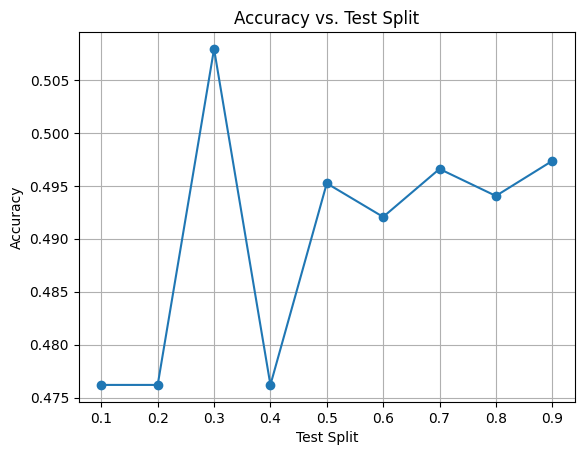

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Model - Logisic Regression

In [ ]:
splits = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracies = []
for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2) # random_state = set.seed()

  logreg = LogisticRegression(random_state=16, max_iter=10000)

  # fit the model with data
  logreg.fit(X_train, y_train)

  y_pred = logreg.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracies["LogReg"] = np.mean(accuracies)

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.9047619047619048

Classification Report:
               precision    recall  f1-score   support

       Angry       0.90      0.90      0.90        10
     Neutral       0.91      0.91      0.91        11

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.7857142857142857

Classification Report:
               precision    recall  f1-score   support

       Angry       0.88      0.68      0.77        22
     Neutral       0.72      0.90      0.80        20

    accuracy                           0.79        42
   macro avg       0.80      0.79      0.78        42
weighted avg       0.81      0.79      0.78        42

Train-Test split ratio: 70.0% - 30.0%
Accuracy: 0.7936507936507936

Classification Report:
               precision    recall  f1-score   support

       Angry   

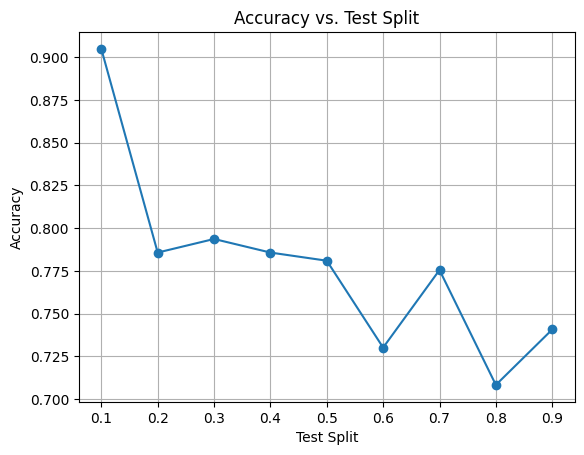

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Model - Naive Bayes


In [ ]:
splits = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracies = []
for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2) # random_state = set.seed()

  model = GaussianNB()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracies["Naive Bayes"] = np.mean(accuracies)

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.8095238095238095

Classification Report:
               precision    recall  f1-score   support

       Angry       0.75      0.90      0.82        10
     Neutral       0.89      0.73      0.80        11

    accuracy                           0.81        21
   macro avg       0.82      0.81      0.81        21
weighted avg       0.82      0.81      0.81        21

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.7857142857142857

Classification Report:
               precision    recall  f1-score   support

       Angry       0.84      0.73      0.78        22
     Neutral       0.74      0.85      0.79        20

    accuracy                           0.79        42
   macro avg       0.79      0.79      0.79        42
weighted avg       0.79      0.79      0.79        42

Train-Test split ratio: 70.0% - 30.0%
Accuracy: 0.9047619047619048

Classification Report:
               precision    recall  f1-score   support

       Angry   

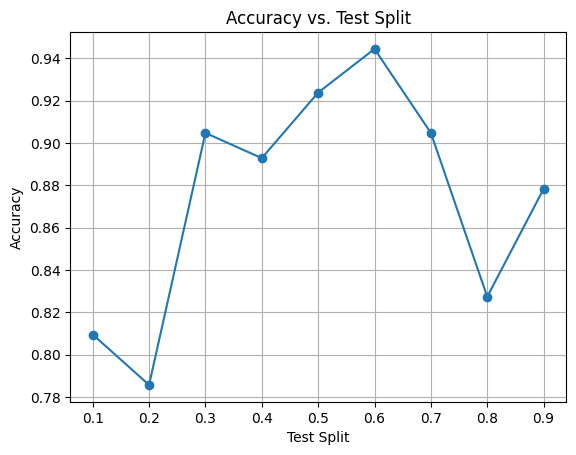

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Model - Random Forest

In [ ]:
splits = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracies = []
for test_split_ratio in splits:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_ratio, random_state=2) # random_state = set.seed()

  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Train-Test split ratio: {(1-test_split_ratio)*100:.1f}% - {test_split_ratio*100:.1f}%")
  print(f"Accuracy: {accuracy}")
  accuracies.append(accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

avg_accuracies["Random Forest"] = np.mean(accuracies)

Train-Test split ratio: 90.0% - 10.0%
Accuracy: 0.8095238095238095

Classification Report:
               precision    recall  f1-score   support

       Angry       0.80      0.80      0.80        10
     Neutral       0.82      0.82      0.82        11

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21

Train-Test split ratio: 80.0% - 20.0%
Accuracy: 0.8095238095238095

Classification Report:
               precision    recall  f1-score   support

       Angry       0.89      0.73      0.80        22
     Neutral       0.75      0.90      0.82        20

    accuracy                           0.81        42
   macro avg       0.82      0.81      0.81        42
weighted avg       0.82      0.81      0.81        42

Train-Test split ratio: 70.0% - 30.0%
Accuracy: 0.873015873015873

Classification Report:
               precision    recall  f1-score   support

       Angry    

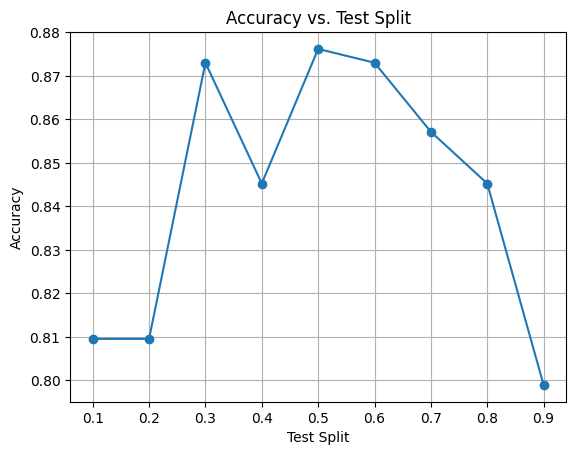

In [ ]:
plt.plot(splits, accuracies, marker='o')
plt.xlabel('Test Split')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Split')
plt.grid(True)
plt.show()

#Models Perfomance

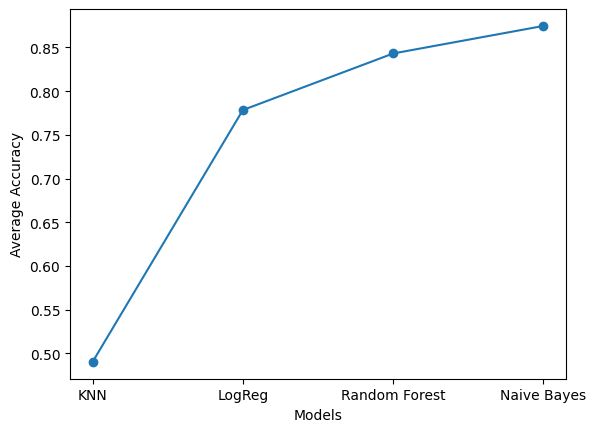

In [ ]:
avg_accuracies_sorted = {k: v for k, v in sorted(avg_accuracies.items(), key=lambda item: item[1])}

keys = list(avg_accuracies_sorted.keys())
values = list(avg_accuracies_sorted.values())

plt.plot(keys, values, marker = 'o')
plt.xlabel("Models")
plt.ylabel("Average Accuracy")
plt.show()